# Employee Performance Analysis



This project is performed to analyse the data for;

- identifying the important factors that affect the performance of the employees
- gaining insights from the analysis to provide recommendations to improve employee performance.

and also to train a model that can accurately predict the performance rating of the employee.

<b> The following insights are expected in this project: </b>

- Top 3 factors affecting emoplyee performance.
- Department wise performances.
- A trained model which can predict the employee performance based on factors as inputs.
- Recommendations to improve the employee performance based on insights from analysis.

# Data Exploratory Analysis

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
df = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls", index_col=0)
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


In [3]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, E1001000 to E100998
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfa

In [4]:
# Statistical Information about the data
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [5]:
# Checking for null values

df.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

#### There are no null values in the dataset

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

#### There are no duplicates

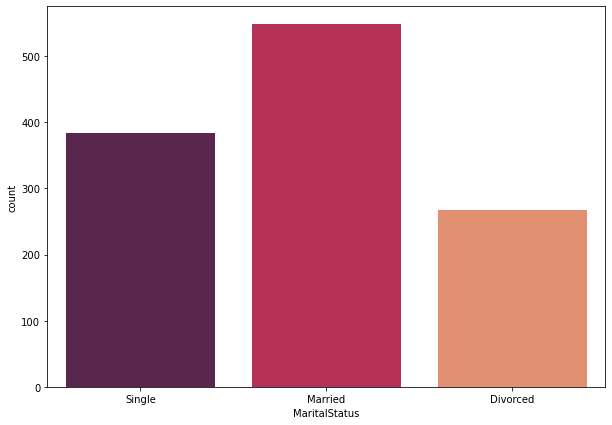

In [8]:
# Plotting the graph for MaritalStatus

plt.figure(figsize=(10, 7))
sns.countplot(x=df['MaritalStatus'], palette='rocket')
plt.show()

#### Married employees are more in number, then single and divorced respectively.

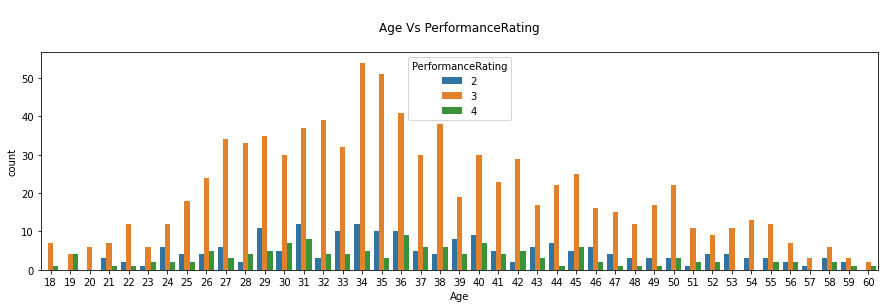

In [9]:
# Age Vs PerformanceRating
plt.figure(figsize=(15, 4))
ax = sns.countplot(x = df ['Age'], hue = df['PerformanceRating'])
plt.title("\nAge Vs PerformanceRating\n")
plt.show()

#### Employees between the age of 27 to 38 have good performance rating

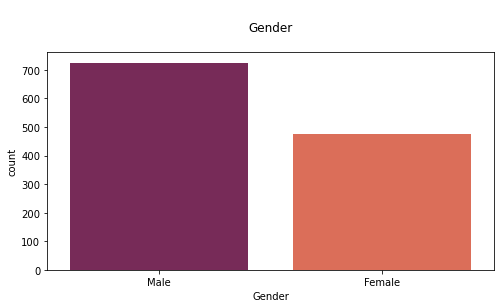

In [15]:
# Plotting the Gender
plt.figure(figsize=(8, 4))
sns.countplot(x = df ['Gender'], palette='rocket')
plt.title("\nGender\n")
plt.show()

#### Male employees more than the female employees

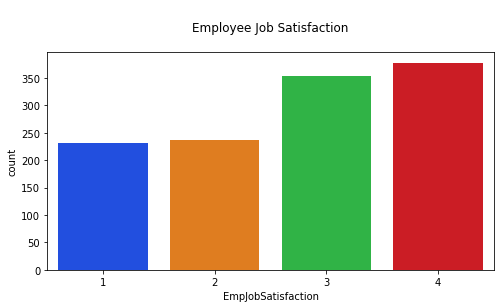

In [19]:

# Plotting the EmpJobSatisfaction
plt.figure(figsize=(8, 4))
sns.countplot(x = df ['EmpJobSatisfaction'], palette='bright')
plt.title("\nEmployee Job Satisfaction\n")
plt.show()

#### Most of the employees are satisfied with their job in this company

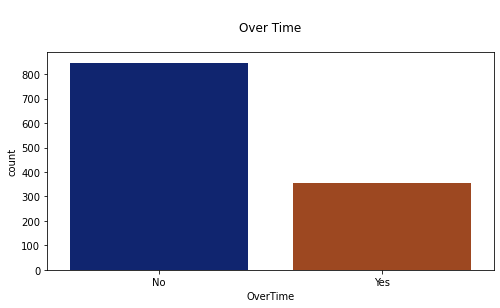

In [20]:
# Plotting the OverTime
plt.figure(figsize=(8, 4))
sns.countplot(x = df ['OverTime'], palette='dark')
plt.title("\nOver Time\n")
plt.show()

#### Around 30% employees are doing overtime in this company

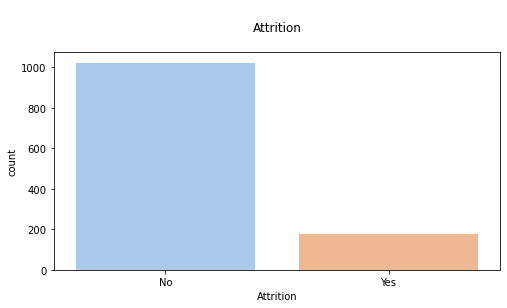

In [21]:
# Plotting the Attrition
plt.figure(figsize=(8, 4))
sns.countplot(x = df['Attrition'], palette='pastel')
plt.title("\nAttrition\n")
plt.show()

#### The percentage of Employee Attrition is 20%

### Numerical Features

In [7]:
num_data = df.select_dtypes(include=[np.number])
num_data

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,
E1001000,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
E1001006,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
E1001007,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
E1001009,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
E1001010,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E100992,27,3,1,4,71,4,2,4,1,20,2,6,3,3,6,5,0,4,4
E100993,37,10,2,4,80,4,1,4,3,17,1,4,2,3,1,0,0,0,3
E100994,50,28,1,4,74,4,1,3,1,11,3,20,3,3,20,8,3,8,3


### Categorical Features

In [8]:
cat_data = df.select_dtypes(exclude=[np.number])
cat_data

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
EmpNumber,,,,,,,,
E1001000,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
E1001006,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
E1001007,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
E1001009,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
E1001010,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...
E100992,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
E100993,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
E100994,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No


In [9]:
# Converting the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
categorical_col = cat_data.columns
label = LabelEncoder()
df[categorical_col] = df[categorical_col].apply(lambda col:label.fit_transform(col))
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
E1001006,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
E1001007,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
E1001009,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
E1001010,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


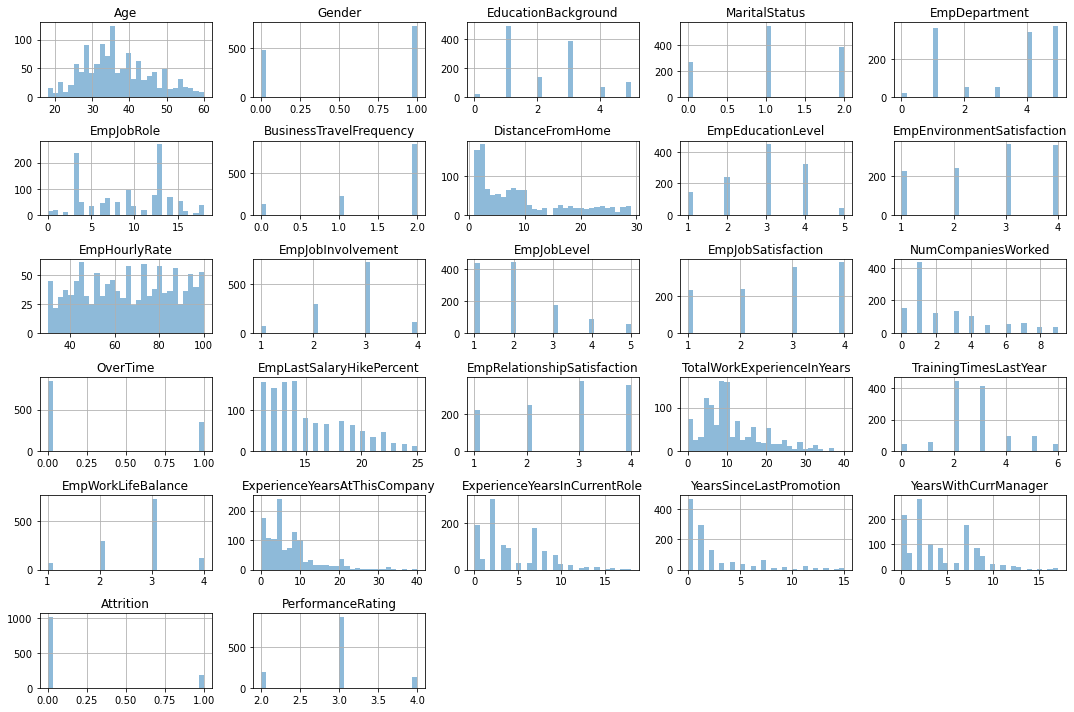

In [10]:
df.hist(bins=30, figsize=(15, 10), alpha=.5)
plt.tight_layout()
plt.show()

### Correlation Heatmap

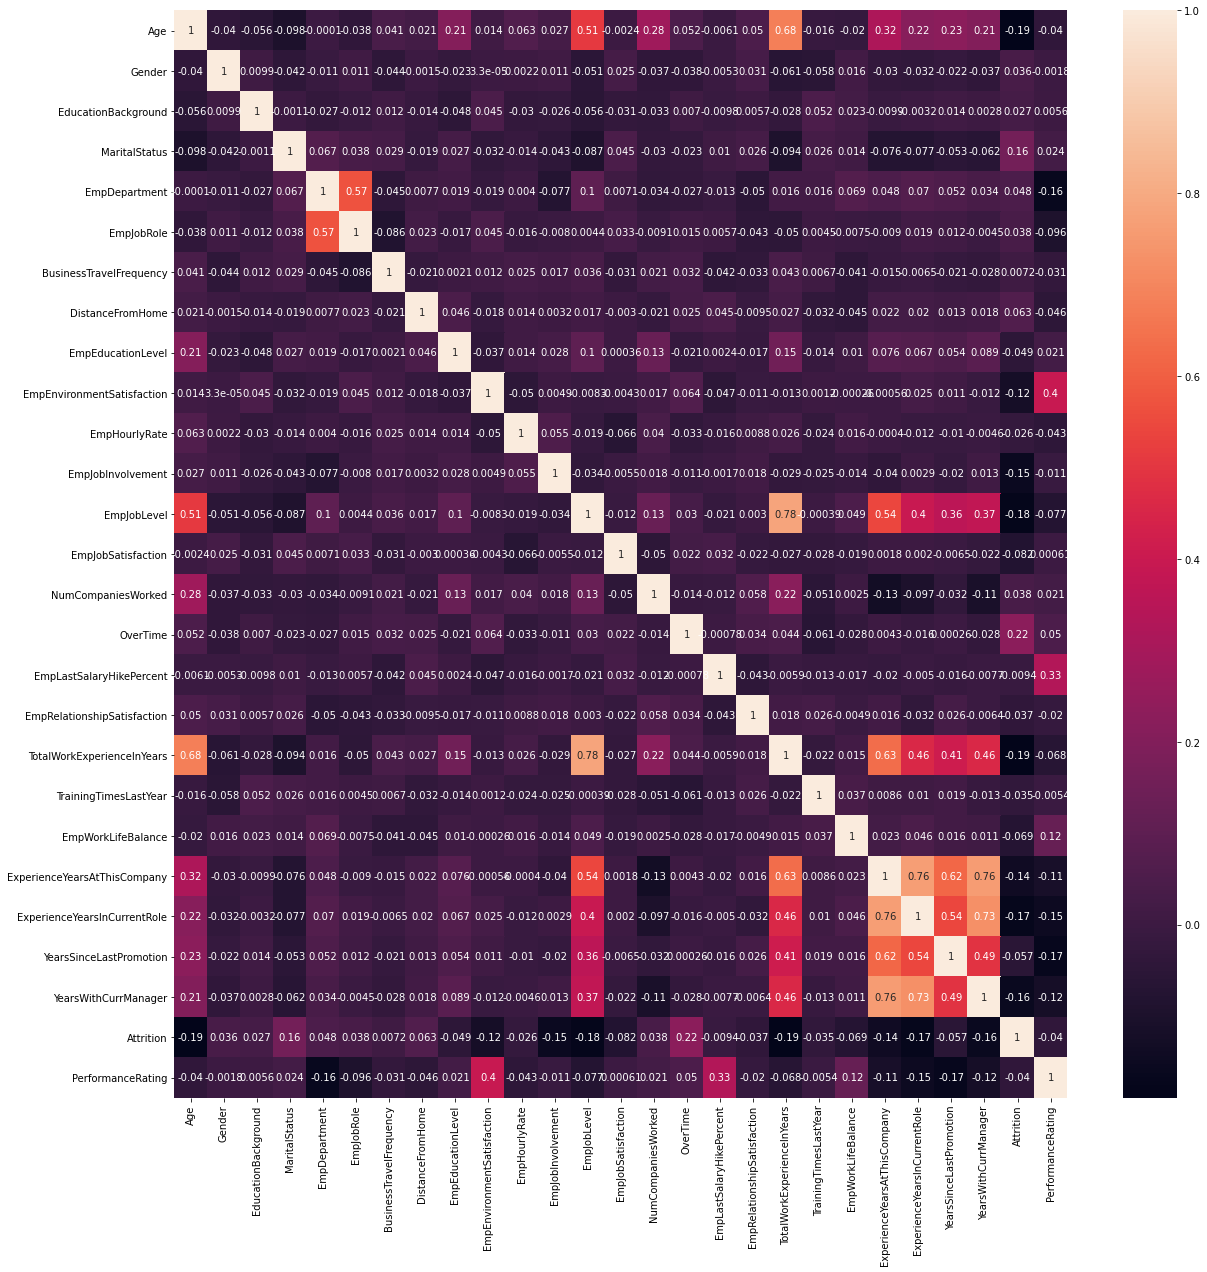

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

From the above correlation heatmap, we infer that:
    
    - TotalWorkExperienceInYears and EmpJobLevel is highly correlated with each other.
    - TotalWorkExperienceInYears and YearsWithCurrManager is highly correlated with each other. 
    - ExperienceYearsInCurrentRole and ExperienceYearsInCurrentRole is higly correlated with each other.
    - ExperienceYearsInCurrentRole and YearsWithCurrManager are highly correlated with each other.

In [13]:
indep_v = df.iloc[:, :-1]
targ_v = df.iloc[:, -1]
indep_v.corrwith(targ_v)

Age                            -0.040164
Gender                         -0.001780
EducationBackground             0.005607
MaritalStatus                   0.024172
EmpDepartment                  -0.162615
EmpJobRole                     -0.096209
BusinessTravelFrequency        -0.031025
DistanceFromHome               -0.046142
EmpEducationLevel               0.020529
EmpEnvironmentSatisfaction      0.395561
EmpHourlyRate                  -0.043116
EmpJobInvolvement              -0.010539
EmpJobLevel                    -0.076632
EmpJobSatisfaction              0.000606
NumCompaniesWorked              0.020980
OverTime                        0.050206
EmpLastSalaryHikePercent        0.333722
EmpRelationshipSatisfaction    -0.019502
TotalWorkExperienceInYears     -0.068141
TrainingTimesLastYear          -0.005443
EmpWorkLifeBalance              0.124429
ExperienceYearsAtThisCompany   -0.111645
ExperienceYearsInCurrentRole   -0.147638
YearsSinceLastPromotion        -0.167629
YearsWithCurrMan

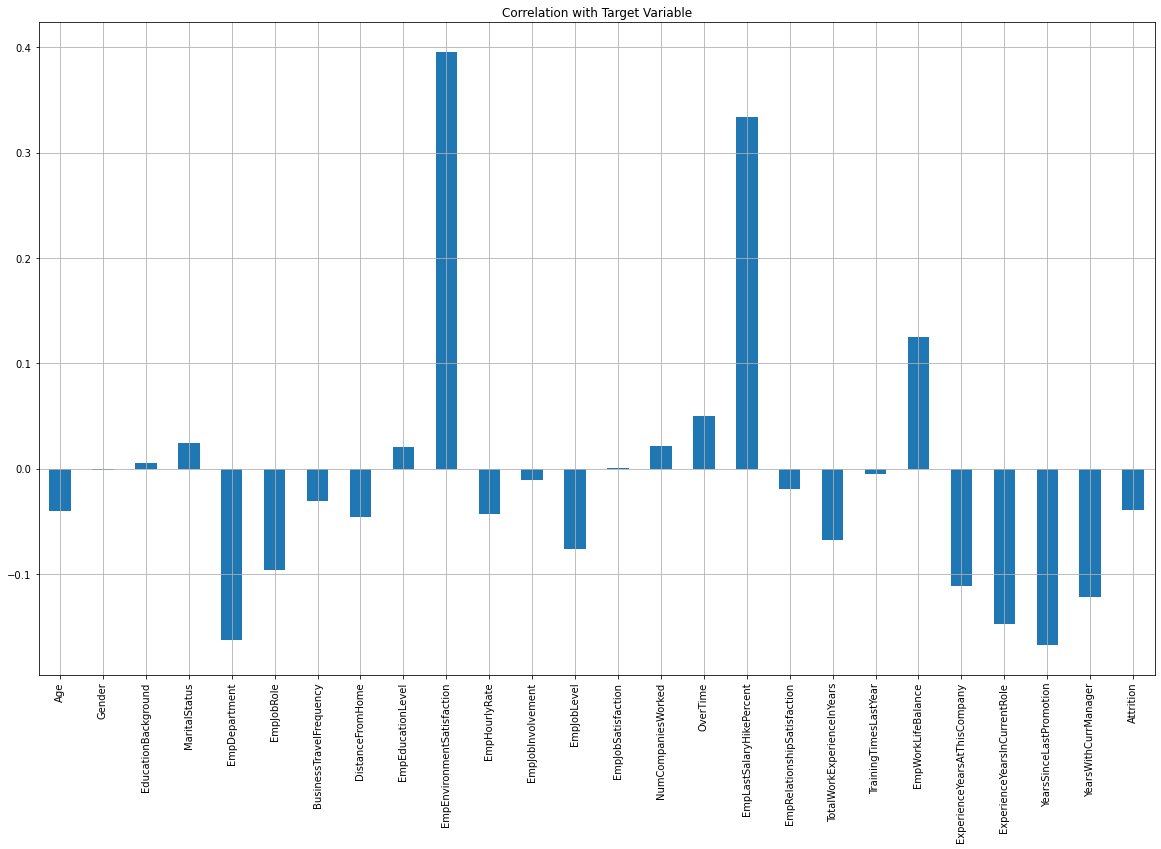

In [14]:
indep_v.corrwith(targ_v).plot(kind='bar', grid=True, figsize=(20, 12), title="Correlation with Target Variable")
plt.show()

### <u> Top 3 factors affecting employee performance are: <br>
<font color= dark blue>

1. EmpEnvironmentSatisfaction </br>
2. EmpLastSalaryHikePercent </br>
3. YearsSinceLastPromotion </font>

Features having significant correlation are EmpDepartment, EmpJobRole, EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrentManager.

## Features that are positively correlated to the target variable

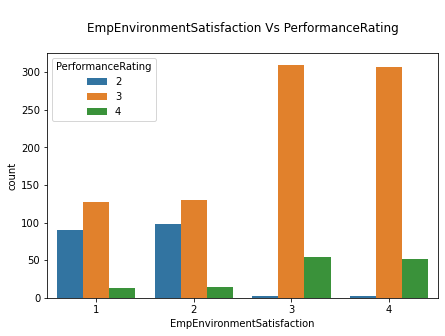

In [15]:
# EmpEnvironmentSatisfaction Vs PerformanceRating
plt.figure(figsize=(7, 4.5))
ax = sns.countplot(x = df ['EmpEnvironmentSatisfaction'], hue = df['PerformanceRating'])
plt.title("\nEmpEnvironmentSatisfaction Vs PerformanceRating\n")
plt.show()

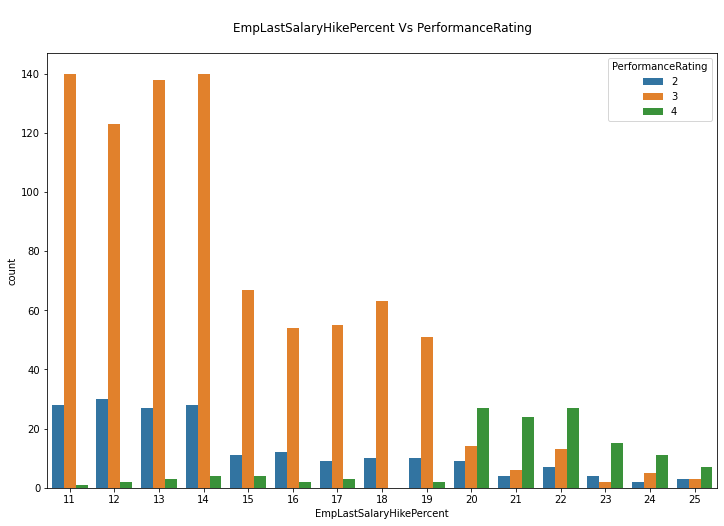

In [16]:
# EmpLastSalaryHikePercent Vs PerformanceRating
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = df ['EmpLastSalaryHikePercent'], hue = df['PerformanceRating'])
plt.title("\nEmpLastSalaryHikePercent Vs PerformanceRating\n")
plt.show()

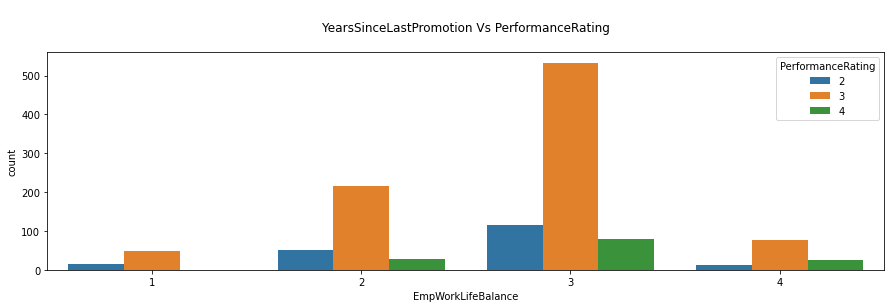

In [17]:
# YearsSinceLastPromotion Vs PerformanceRating
plt.figure(figsize=(15, 4))
ax = sns.countplot(x = df ['EmpWorkLifeBalance'], hue = df['PerformanceRating'])
plt.title("\nYearsSinceLastPromotion Vs PerformanceRating\n")
plt.show()

## Features that are negatively correlated to the target variable

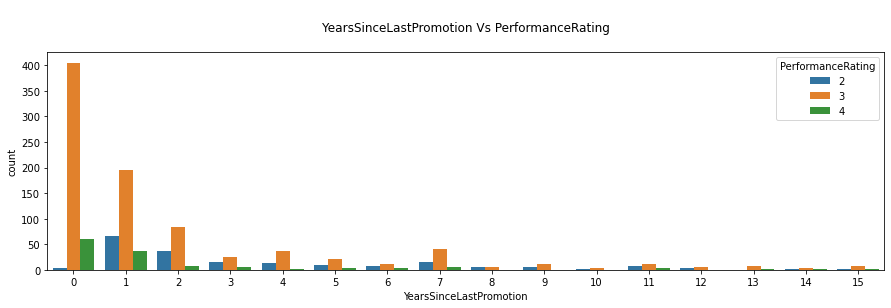

In [18]:
# YearsSinceLastPromotion Vs PerformanceRating
plt.figure(figsize=(15, 4))
ax = sns.countplot(x = df ['YearsSinceLastPromotion'], hue = df['PerformanceRating'])
plt.title("\nYearsSinceLastPromotion Vs PerformanceRating\n")
plt.show()

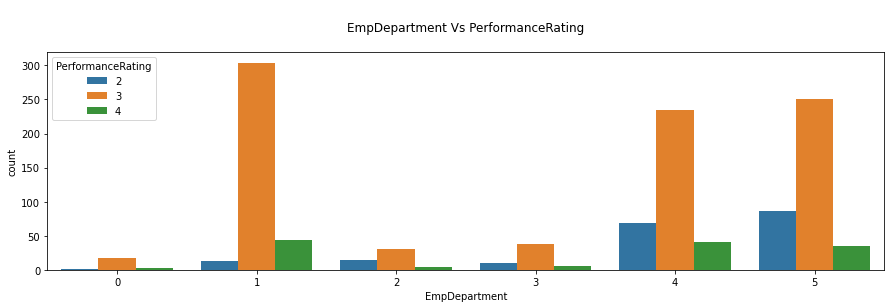

In [19]:
# EmpDepartment Vs PerformanceRating
plt.figure(figsize=(15, 4))
ax = sns.countplot(x = df ['EmpDepartment'], hue = df['PerformanceRating'])
plt.title("\nEmpDepartment Vs PerformanceRating\n")
plt.show()

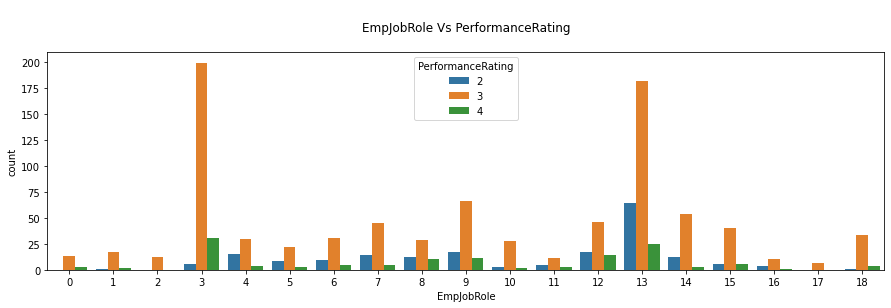

In [20]:
# EmpJobRole Vs PerformanceRating
plt.figure(figsize=(15, 4))
ax = sns.countplot(x = df ['EmpJobRole'], hue = df['PerformanceRating'])
plt.title("\nEmpJobRole Vs PerformanceRating\n")
plt.show()

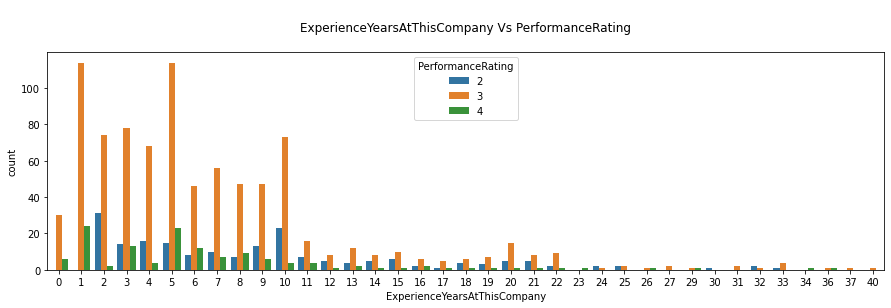

In [21]:
# ExperienceYearsAtThisCompany Vs PerformanceRating
plt.figure(figsize=(15, 4))
ax = sns.countplot(x = df ['ExperienceYearsAtThisCompany'], hue = df['PerformanceRating'])
plt.title("\nExperienceYearsAtThisCompany Vs PerformanceRating\n")
plt.show()

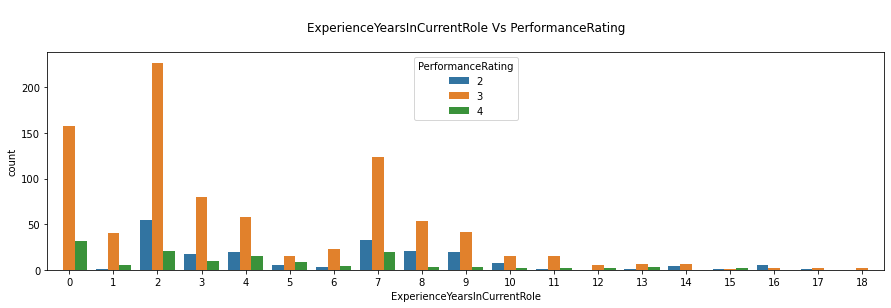

In [22]:
# ExperienceYearsInCurrentRole Vs PerformanceRating
plt.figure(figsize=(15, 4))
ax = sns.countplot(x = df ['ExperienceYearsInCurrentRole'], hue = df['PerformanceRating'])
plt.title("\nExperienceYearsInCurrentRole Vs PerformanceRating\n")
plt.show()

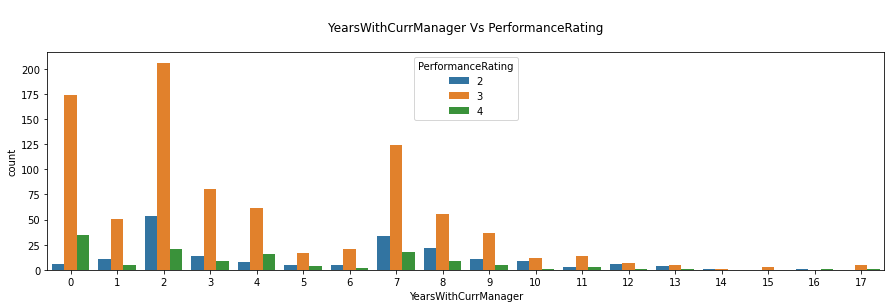

In [23]:
# YearsWithCurrManager Vs PerformanceRating
plt.figure(figsize=(15, 4))
ax = sns.countplot(x = df ['YearsWithCurrManager'], hue = df['PerformanceRating'])
plt.title("\nYearsWithCurrManager Vs PerformanceRating\n")
plt.show()

## Department Wise Performance

In [24]:
# Creating a new dataframe to analyze department wise performance
department = df.iloc[:, 5:27].copy()
department.head()

,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,13,2,10,3,4,55,3,2,4,1,...,4,10,2,2,10,7,0,8,0,3
E1001006,13,2,14,4,4,42,3,2,1,2,...,4,20,2,3,7,7,1,7,0,3
E1001007,13,1,5,4,4,48,2,3,1,5,...,3,20,2,3,18,13,1,12,0,4
E1001009,8,2,10,4,2,73,2,5,4,3,...,2,23,2,2,21,6,12,6,0,3
E1001010,13,2,16,4,1,84,3,2,1,8,...,4,10,1,3,2,2,2,2,0,3


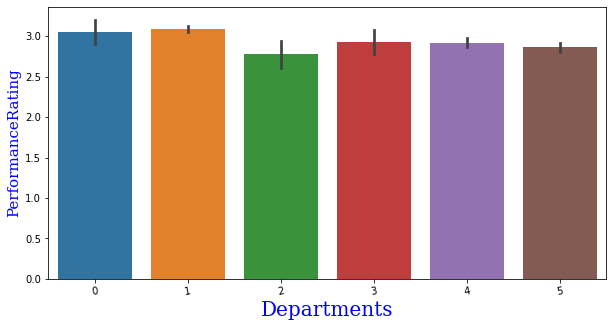

In [25]:
# Finding out the mean performance of all the department to see which has the highest performance rating
dept_performance = department.copy()
dept_performance.groupby(by=df['EmpDepartment'])['PerformanceRating'].mean

#plot
plt.figure(figsize=(10, 5))
sns.barplot(x=df['EmpDepartment'], y=dept_performance['PerformanceRating'])
plt.xlabel("Departments", fontdict = {'family':'Serif', 'color':'blue', 'size':20})
plt.ylabel("PerformanceRating", fontdict = {'family':'Serif', 'color':'blue', 'size':15})
plt.xticks(rotation=10)
plt.show()

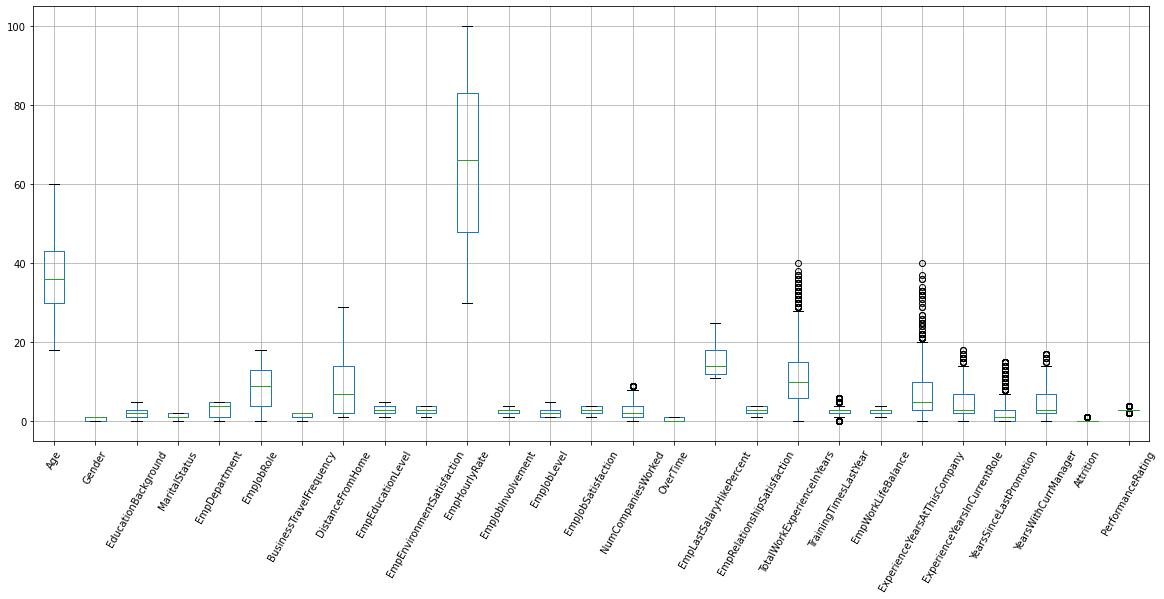

In [26]:
# Detecting the outliers for all the columns in the dataset

plt.figure(figsize=(20, 8))
df.boxplot()
plt.xticks(rotation=60)
plt.show()

__We have outliers in the below columns:__<br><br>

<font color=darkviolet> __TotalWorkExperienceInYears <br> TrainingTimesLastYear <br> ExperienceYearsAtThisCompany <br> ExperienceYearsInCurrentRole <br> YearsSinceLastPromotion <br> YearsWithCurrManager__ </font> <br>
